### chap4. 데이터 표현과 특성 공학
- 파이썬 라이브러리를 활용한 머신러닝 4장
- 목차
    - 범주형 변수
    - OneHotEncoder
    - ColumnTransformer
    - LabelEncoder
    - 구간분할

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 4.1 범주형 변수

In [15]:
# 데이터 로딩
df = pd.read_csv('adult.data', sep=',\s+')
df.head()

C:\Users\wng37\AppData\Local\Temp\ipykernel_19984\3781898368.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('adult.data', sep=',\s+')


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### 4.1.1 원-핫-인코딩(가변수) one-hot-encoding, dummy variable, one-out-of-N encoding
- 범주형을 사용하는 가장 널리 쓰이는 방법
- 문자열(object), 카테고리(category) 같은 범주형 유형들이 자동으로 변환
- 숫자형도 인코딩하기 위해선, columns 매개변수에 컬럼명을 집어넣거나 숫자형을 문자형으로 형변환하면 된다.

In [18]:
df['State-gov'].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [31]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,39,77516,13,2174,0,40,State-gov_?,State-gov_Federal-gov,State-gov_Local-gov,State-gov_Never-worked,...,United-States_Scotland,United-States_South,United-States_Taiwan,United-States_Thailand,United-States_Trinadad&Tobago,United-States_United-States,United-States_Vietnam,United-States_Yugoslavia,<=50K_<=50K,<=50K_>50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [45]:
x = df_dummy.iloc[:, :108].values
y = df_dummy.iloc[:, 109].values

In [47]:
print(x.shape, y.shape)

(32560, 108) (32560,)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
lg = LogisticRegression(max_iter=1000)
lg.fit(x_train, y_train)
print(f'train score : {lg.score(x_train, y_train)}')
print(f'test score : {lg.score(x_test, y_test)}')

train score : 0.797051597051597
test score : 0.7998771498771499


## 4.2 OneHotEncoder 
- scikit-learn의 클래스로, 숫자형, 문자형 모두에 대해서 인코딩 수행
- sparse=False를 설정하면 OneHotEncoder는 희소행렬 댇신 넘파이 배열로 변환됨
- get_feature_names_out 메서드를 사용하면 원본 범주형 변수 이름을 얻는다. 

In [51]:
from sklearn.preprocessing import OneHotEncoder
# sparse=False를 설정하면 OneHotEncoder는 희소행렬 댇신 넘파이 배열로 변환됨
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(df))


[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [53]:
print(ohe.get_feature_names_out())

['39_17' '39_18' '39_19' ... 'United-States_Yugoslavia' '<=50K_<=50K'
 '<=50K_>50K']


In [57]:
dg = pd.read_csv('titanic.csv')
dg.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ColumnTransformer 사용
- 이름, 변환기 객체, 이변환이 적용될 열로 지정

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([("scaling", StandardScaler(), ['Age','Fare']), 
('onehot', OneHotEncoder(sparse=False), ['Sex', 'Pclass'])])

In [61]:
dg_feature = dg.drop(columns=['Survived'])
x_train, x_test, y_train, y_test = train_test_split(dg_feature, dg.Survived, random_state=42)
ct.fit(x_train)
x_train_trans = ct.transform(x_train)
print(x_train_trans.shape)

(668, 7)


## LabelEncoder 사용

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dg['Sex'] = le.fit_transform(dg['Sex'])

In [69]:
dg.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### 4.4 구간분할
- 연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 중 하나는 한 특성을 여러 특성으로 나누는 __구간분할bining__
- 구간분할 수행 : KBinsDiscretizer

In [72]:
from sklearn.datasets import load_wine
data, target = load_wine(as_frame = True, return_X_y=True)

In [85]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


[]

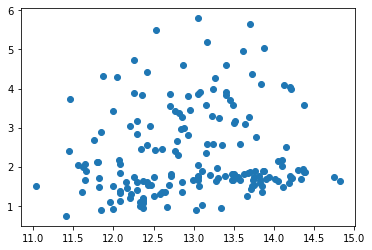

In [87]:
plt.scatter(data['alcohol'], data['malic_acid'])
plt.plot()

In [89]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(data[['alcohol']])
print(kb.bin_edges_)  # bin_edges_에는 경곗값이 저장

[array([11.03, 11.41, 11.79, 12.17, 12.55, 12.93, 13.31, 13.69, 14.07,
        14.45, 14.83])                                                ]


In [90]:
data_binned = kb.transform(data[['alcohol']])
data_binned   # 희소행렬 형태로 반환

<178x10 sparse matrix of type '<class 'numpy.float64'>'
	with 178 stored elements in Compressed Sparse Row format>

In [91]:
data_binned.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KBinsDiscretizer was fitted with feature names
  warnings.warn(


c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.

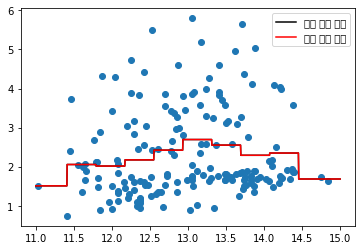

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

line = np.linspace(11,15,1000, endpoint=False).reshape(-1,1)
line_binned = kb.transform(line)
reg = LinearRegression().fit(data_binned,data['malic_acid'])

plt.plot(line, reg.predict(line_binned), label='구간 결정 트리', c='black')
plt.scatter(data['alcohol'], data['malic_acid'])

reg = DecisionTreeRegressor(min_samples_split=3).fit(data_binned,data['malic_acid'] )
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리', c='red')
plt.legend(loc='best')

- 결정트리와 선형회귀 모두 같은 직선으로 예측

In [2]:
# 파일 생성기
import os
def make_backjoon(FILENAME): 
    with open(f'{FILENAME}.py', mode='a', encoding='utf-8') as f:
        f.write(f'{FILENAME}')

make_backjoon('exer_10989')